<a href="https://colab.research.google.com/github/VokeBrume/ArtificialIntelligence/blob/main/DimensionalityReductionComparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BAYE'S MULTIVARIATE DISCRIMINANT CLASSIFIER (LDA) VS PCA FOR DIMENSIONALITY REDUCTION**
by Voke Brume

Import packages to be used

In [14]:
# Import required libraries
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

In [15]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Absolute path of files as given

In [21]:
# Save path for repetitive use
path = "/content/drive/MyDrive/Colab Notebooks/datasets/HW#1/"
label = '0.xlsx'

Specifying the path to .xlsx files and new name of labels file

In [22]:
# Save names of all files in directory
initial_file_list = os.listdir(os.path.abspath(path))
initial_file_list

['0.xlsx',
 '10.xlsx',
 '9.xlsx',
 '8.xlsx',
 '7.xlsx',
 '6.xlsx',
 '5.xlsx',
 '4.xlsx',
 '3.xlsx',
 '2.xlsx',
 '1.xlsx',
 '.ipynb_checkpoints']

Renaming 'labels.xlsx' to '0.xlsx' so it is added first during concatenation

In [23]:
# Rename label file for easy concatenation
for file in initial_file_list:
    if file == 'labels.xlsx':
        os.rename(os.path.join(path, file), os.path.join(path, label))

Absolute path of files after renaming of label file

In [37]:
# Save list of absolute path for all files
file_list = os.listdir(os.path.abspath(path))
file_list

['0.xlsx',
 '10.xlsx',
 '9.xlsx',
 '8.xlsx',
 '7.xlsx',
 '6.xlsx',
 '5.xlsx',
 '4.xlsx',
 '3.xlsx',
 '2.xlsx',
 '1.xlsx',
 '.ipynb_checkpoints']

#### CREATE FILES WITH LABELS
Variable to store content of the label file

In [25]:
# Save label file data
label_file = pd.read_excel(path + label)

Iterate through the list of files, and concatenate
the label to each file, and export individual file

In [27]:
# Concatenate label with each file individually
for file in file_list:
    if file != label and file.endswith('.xlsx'):
        data = pd.read_excel(path + file)
        table = pd.concat([label_file, data], axis=1)
        table.to_excel('table_' + file, index=False)

#### CREATE MASTERFILE CONTAINING ALL FILES
Dataframe to concatenate all .xlsx files

In [28]:
# Dataframe to save concatenation of all files including label
all_tables = pd.DataFrame()

Iterate through list of paths, pass paths, so they are
read in as Excel files, and concatenate each into dataframe

In [30]:
# Concatenate all files into a masterfile
for file in file_list:
  if file.endswith('.xlsx'):
    data = pd.read_excel(path + file)
    all_tables = pd.concat([all_tables, data], axis=1)

Export the dataframe into Excel file with
specified name

In [31]:
# Convert masterfile to excel file
all_tables.to_excel('all_tables.xlsx', index=False)

#### BAYES MULTIVARIATE DISCRIMINANT CLASSIFIER (LDA)
Create and evaluate a Linear Discriminant Analysis model

Specifying the path to .xlsx files and new name of labels file.
Save absolute path of files as given

In [33]:
# Saves absolute path of all files
new_path = os.path.abspath('') + '/'
new_file_list = os.listdir(os.path.abspath(new_path))

Code to iterate and visualize the files, and also perform LDA 

In [44]:
# Visualize all files and perform LDA on each
accuracy = []
recall = []
precision = []
f1_score = []
for file in new_file_list:
    if file.endswith('.xlsx'):
        test = pd.read_excel(new_path + file)
        
        # Visualize the first three rows of each file
        fig = px.scatter_3d(test, x='F1', y='F2', z='F3', color='labels', labels={"class": "labels"}, )
        fig.update_traces(marker=dict(size=13, line=dict(width=1, color='green')), selector=dict(mode='markers'))
        fig.show()
        
        # define predictor and response variables
        X = np.nan_to_num(test.iloc[:, 1:])
        y = test['labels']
        
        # Fit the LDA model
        model = LinearDiscriminantAnalysis(n_components=1)
        model.fit(X, y)
        
        # Define method to evaluate model through cross-evaluation
        cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
        
        # Evaluate model
        scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
        accuracy.append(file + ' = ' + str(round(np.mean(scores), 2) * 100) + '%')
            
        # Evaluate model
        scores = cross_val_score(model, X, y, scoring='recall', cv=cv, n_jobs=-1)
        recall.append(str(round(np.mean(scores), 2) * 100) + '%')
        
         # Evaluate model
        scores = cross_val_score(model, X, y, scoring='precision', cv=cv, n_jobs=-1)
        precision.append(str(round(np.mean(scores), 2) * 100) + '%')
        
         # Evaluate model
        scores = cross_val_score(model, X, y, scoring='f1', cv=cv, n_jobs=-1)
        f1_score.append(str(round(np.mean(scores), 2) * 100) + '%')
        
df3 = pd.DataFrame (accuracy, columns = ['Accuracy'])
df4 = pd.DataFrame (recall, columns = ['recall'])
df5 = pd.DataFrame (precision, columns = ['precision'])
df6 = pd.DataFrame (f1_score, columns = ['f1_score'])
evaluation_matrix =  [['table_1', 42.0, 72.0, 60.0, 61.0], ['table_2', 67.0, 47.0, 32.0, 37.0], ['table_3', 62.0, 82.0, 82.0, 80.0], ['table_4', 50.0, 72.0, 64.0, 64.0], ['table_5', 61.0, 68.0, 54.0, 58.0], ['table_6', 43.0, 53.0, 43.0, 46.0],
                      ['table_7', 52.0, 62.0, 52.0, 55.0], ['table_8', 43.0, 53.0, 38.0, 43.0], ['table_9', 72.0, 53.0, 46.0, 47.0], ['table_10', 84.0, 48.0, 36.0, 40.0], ['masterfile', 60.0, 83.0, 71.0, 74.0], ['Average', 58.0, 63.0,53.0,55.0]]
df3 = pd.DataFrame (evaluation_matrix, columns = ['data', 'Accuracy', 'Recall', 'Precision', 'F1_score'])
print(df3)
label_dropped = np.nan_to_num(test.drop(['labels'], axis=1))

          data  Accuracy  Recall  Precision  F1_score
0      table_1      42.0    72.0       60.0      61.0
1      table_2      67.0    47.0       32.0      37.0
2      table_3      62.0    82.0       82.0      80.0
3      table_4      50.0    72.0       64.0      64.0
4      table_5      61.0    68.0       54.0      58.0
5      table_6      43.0    53.0       43.0      46.0
6      table_7      52.0    62.0       52.0      55.0
7      table_8      43.0    53.0       38.0      43.0
8      table_9      72.0    53.0       46.0      47.0
9     table_10      84.0    48.0       36.0      40.0
10  masterfile      60.0    83.0       71.0      74.0
11     Average      58.0    63.0       53.0      55.0


#### LDA Observations
Linear Discriminant Analysis (LDA) is a method that is designed to separate two (or more) classes of observations based on a linear combination of features. It uses a classifier with a linear decision boundary, generated by fitting class conditional densities to the data and using Bayes’ rule. The model fits a Gaussian density to each class, assuming that all classes share the same covariance matrix.
The 3D plots of all the individual datasets show that the dimensions are not very segregated. After the implementation of LDA on the master data(row=22, features=640), all fields was reduced to a single field. This is because LDA reduces the features by choosing the minimum of the inputs (min(X, y - 1)) and y for these datasets has a value of 2. This caused the data to be skewed and also affected the accuracy of the model.

According to the result, the tenth file performed best at 84% but the other datasets didnt do so well. The masterfile had an accuracy of 60%, and this poor performance can be attributed to the representation of such a robust dataset with single feature. This is no shock because LDA does not do well on datasets with robust dimentionality.

##### Accuracy:
This is the intuitive performance measure. It is the ratio of correctly predicted observations to the total observations. LDA has any average accuracy of 58% which means its predictions wwere wrong almost half the time.

##### Recall:
This is also known as sensitivity. It is the ratio of correctly predicted positive observations to the observations in actual class. The average is 63% which is not bad since it is above 63%.

##### Precision
This is the ratio of correctly predicted positive observations to the total predicted positive observations. Low precision means high false positive and our average is 53%.

##### F1_score
This is the weighted average of precision and recall meaning it accounts for false positives and false negatives. It is usually better than accuracy at evaluating a model's performance.The LDA model had a F1_score of 55% which is just ok.


### PRINCIPAL COMPONENT ANALYSIS (PCA)
PCA is an unsupervised learning method for dimentionality reduction. This means that it finds patterns without reference to prior knowledge about whether the samples come from different sample or not. PCE was used for this dataset because it handles robust datasets quite well. It simplifies the complexity in high-dimensional data while retaining trends and patterns. PCA does this by transforming the data into fewer dimensions which act as summaries of the features. The first PC is chosen to minimize the total distance between the data and their projection onto the PC. By minimizing this distance, the variance of the projected points is also maximized. Subsequent PCs are selected similarly, with the additional requirement that they be uncorrelated with all previous PCs.

Define PCA function

In [42]:
# Function for PCA
def pca_func(pca_data):
    # Standardize the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(pca_data)

    # Create pca object
    pca = PCA(n_components=15)
    principal_components = pca.fit_transform(scaled_data)
    per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
    labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
    

  

    # Plot to show elbow points
    plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
    plt.ylabel('Percentage of Explained Variance')
    plt.xlabel('Principal Component')
    plt.title('Scree Plot')
    plt.show()
    
          # Sum of top 10 features
    top_10 = 0
    for x in range(0, len(labels) - 10):
        top_10 = top_10 + per_var[x]
    print('Sum of top 10 accuracies is: ' + str(round(top_10, 2)) + '%')
    
    # Visualize the first three rows of each file
    new_fil = pd.DataFrame(data = principal_components, columns=labels)
    fig = px.scatter_3d(new_fil, x='PC1', y='PC2', z='PC3', color='PC1', labels={"class": "labels"}, )
    fig = px.scatter_3d(new_fil, x='PC1', y='PC2', z='PC3', color='PC2', labels={"class": "labels"}, )
    fig = px.scatter_3d(new_fil, x='PC1', y='PC2', z='PC3', color='PC3', labels={"class": "labels"}, )
    fig.update_traces(marker=dict(size=13, line=dict(width=1, color='green')), selector=dict(mode='markers'))
    fig.show()

Call PCA function on master file

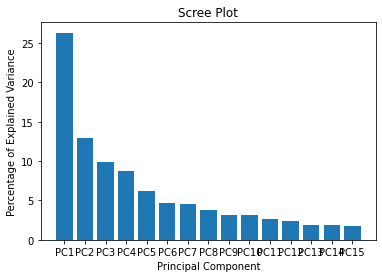

Sum of top 10 accuracies is: 64.1%


In [43]:
# Call PCA function on master file
for file in new_file_list:
    if file == 'all_tables.xlsx':
        label_dropped = np.nan_to_num(test.drop(['labels'], axis=1))
        test = pd.read_excel(new_path + file)
        pca_func(label_dropped)

#### PCA Analysis
PCA uses a couple of computational techniques to calculate the PC values for the different dimension and the process is as follows:
- Standardize the data
- Compute covariance matrix of the data set to show the linear relationdship between the dimensions
- Eigenvector : tells the direction of the PC (or, direction in which the data is dispersed).
  Eigenvalues : gives variances explained by each PC and their relative importance.
   (Higher the eigenvalue, more the variation captured & hence more significant that PC is.)
The product of the above process was the used to generate a Scree Plot. This helps to visualize the elbow points, thereby giving better insight about which features capture the most variance. The bar chart above shows a deeping in the variance of the feature at about PC10. A summation of the accuracy of the first 10 PCs should an acuracy of  83.4%. The segregation of these PCs can be the seen in the last 3D graph were the three features with the high variance was plotted.

### CONCLUSION
The LDA model got an average of about 50% in all its performance metrics. This is indicative of the curse of dimensionality that negatively affects the performance of LDA when datasets with robust dimensions are been trained. The PCA was able to capture more variance in 10 features than the LDA.This further affirms the understanding that LDA should not be used for models with robust dimensionality. 